In [1]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Nadam

In [2]:
from sklearn.model_selection import  train_test_split
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt

In [7]:
from google.colab import files

uploaded = files.upload()

Saving Simulink_ДПТ_10В.csv to Simulink_ДПТ_10В.csv


In [8]:
df = pd.read_csv('Simulink_ДПТ_10В.csv',delimiter=';')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
df

,T,Uдс(вход2),Unnamed: 2,Unnamed: 3,Uдт(вход3),Unnamed: 5,Unnamed: 6,Uрт(выход),Unnamed: 8,Unnamed: 9,Iобщ,Unnamed: 11,Unnamed: 12,wn,Unnamed: 14,Unnamed: 15
0,NaN,U1,U2_diff,U3_int,U4,U5_diff,U6_int,U7,U8_ditt,U9_int,U10,U11_diff,U12_int,U13,U14_diff,U15_int
1,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.169967e-66,1.16996669923822e-66,3.15544362088405e-30,-1.14702617601537e-70,-1.14702617601537e-70,2.36658271566097e-22,2.36658271566097e-22,6.49981499390246e-68,0,3.15544362088405e-29,3.15544362088405e-29,1.49352366668537e-51,4.73316543132195e-22,1.29996299878049e-67,3.89988899746073e-65,1.23592415711364e-35
3,1.843200e-21,1.84320000000000e-21,1.60000000000000e-10,5.81611368201348e-51,5.81611368201348e-51,0.0119999934720000,0.0119999934720000,1.02400000000000e-22,198.988003852207,1.60000000254710e-09,1.60000000254710e-09,3.83999791104000e-12,0.0239999869440000,2.04800000000000e-22,6.14400000000000e-20,3.84000000000000e-10
4,3.981307e-19,3.98130696143209e-19,9.60000000000000e-10,4.93977239027873e-29,4.93977239027873e-29,0.0839997192963500,0.0839997192963500,2.21183720079561e-20,198.915999227722,9.60000009167708e-09,9.60000009167708e-09,1.38239548785200e-10,0.167999438592700,4.42367440159121e-20,1.32710232047736e-17,1.65119790059671e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000028,9.999999e+00,9.999999,0.999997,9.995423,9.995423,0.000002,0.000002,0.555556,-0.000001,6.815096,6.815096,-0.0,0.000004,1.111111,333.333314,-0.000053
1000029,9.999999e+00,9.999999,0.999998,9.995433,9.995433,0.000002,0.000002,0.555556,-0.000001,6.815103,6.815103,-0.0,0.000004,1.111111,333.333314,-0.000053
1000030,9.999999e+00,9.999999,0.999999,9.995443,9.995443,0.000002,0.000002,0.555556,-0.000001,6.815109,6.815109,-0.0,0.000004,1.111111,333.333314,-0.000053
1000031,9.999999e+00,9.999999,1.0,9.995453,9.995453,0.000002,0.000002,0.555556,-0.000001,6.815116,6.815116,-0.0,0.000004,1.111111,333.333314,-0.000053


In [10]:
df=df.drop(index=0)

In [11]:
df

,T,Uдс(вход2),Unnamed: 2,Unnamed: 3,Uдт(вход3),Unnamed: 5,Unnamed: 6,Uрт(выход),Unnamed: 8,Unnamed: 9,Iобщ,Unnamed: 11,Unnamed: 12,wn,Unnamed: 14,Unnamed: 15
1,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.169967e-66,1.16996669923822e-66,3.15544362088405e-30,-1.14702617601537e-70,-1.14702617601537e-70,2.36658271566097e-22,2.36658271566097e-22,6.49981499390246e-68,0,3.15544362088405e-29,3.15544362088405e-29,1.49352366668537e-51,4.73316543132195e-22,1.29996299878049e-67,3.89988899746073e-65,1.23592415711364e-35
3,1.843200e-21,1.84320000000000e-21,1.60000000000000e-10,5.81611368201348e-51,5.81611368201348e-51,0.0119999934720000,0.0119999934720000,1.02400000000000e-22,198.988003852207,1.60000000254710e-09,1.60000000254710e-09,3.83999791104000e-12,0.0239999869440000,2.04800000000000e-22,6.14400000000000e-20,3.84000000000000e-10
4,3.981307e-19,3.98130696143209e-19,9.60000000000000e-10,4.93977239027873e-29,4.93977239027873e-29,0.0839997192963500,0.0839997192963500,2.21183720079561e-20,198.915999227722,9.60000009167708e-09,9.60000009167708e-09,1.38239548785200e-10,0.167999438592700,4.42367440159121e-20,1.32710232047736e-17,1.65119790059671e-08
5,5.491037e-17,5.49103709210333e-17,4.96000000000000e-09,3.92430326568353e-26,3.92430326568353e-26,0.443992277431536,0.443992277431536,3.05057616227963e-18,198.556007635631,4.96000024448086e-08,4.96000024448086e-08,3.69017776823749e-09,0.887984554863073,6.10115232455925e-18,1.83034569736778e-15,4.54268668540751e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000028,9.999999e+00,9.999999,0.999997,9.995423,9.995423,0.000002,0.000002,0.555556,-0.000001,6.815096,6.815096,-0.0,0.000004,1.111111,333.333314,-0.000053
1000029,9.999999e+00,9.999999,0.999998,9.995433,9.995433,0.000002,0.000002,0.555556,-0.000001,6.815103,6.815103,-0.0,0.000004,1.111111,333.333314,-0.000053
1000030,9.999999e+00,9.999999,0.999999,9.995443,9.995443,0.000002,0.000002,0.555556,-0.000001,6.815109,6.815109,-0.0,0.000004,1.111111,333.333314,-0.000053
1000031,9.999999e+00,9.999999,1.0,9.995453,9.995453,0.000002,0.000002,0.555556,-0.000001,6.815116,6.815116,-0.0,0.000004,1.111111,333.333314,-0.000053


In [12]:
from sklearn.metrics import max_error

In [13]:
from sklearn.preprocessing import StandardScaler
 

In [14]:
df1=df[['T','Unnamed: 9', 	'Iобщ', 	'Unnamed: 11', 	'Unnamed: 12', 	'wn' ,	'Unnamed: 14', 	'Unnamed: 15']]

In [15]:
scaler = StandardScaler().fit(df1)

df1=scaler.transform(df1)

In [16]:
df2=df[['Uдс(вход2)', 	'Unnamed: 2', 	'Unnamed: 3', 	'Uдт(вход3)' 	,'Unnamed: 5' 	,'Unnamed: 6' 	,'Uрт(выход)']] 	

In [17]:
scaler = StandardScaler().fit(df2)

df2=scaler.transform(df2)

In [299]:
from sklearn.model_selection import train_test_split
X_train1 ,X_test1,y_train1,y_test1=train_test_split(
df1,
df2,
test_size=0.20    
)


Epoch 1/20


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


4001/4001 [==============================] - 6s 1ms/step - loss: 1.1012 - mean_absolute_error: 0.6454
Epoch 2/20
4001/4001 [==============================] - 5s 1ms/step - loss: 0.9634 - mean_absolute_error: 0.5198
Epoch 3/20
4001/4001 [==============================] - 5s 1ms/step - loss: 0.8443 - mean_absolute_error: 0.4197
Epoch 4/20
4001/4001 [==============================] - 5s 1ms/step - loss: 0.7849 - mean_absolute_error: 0.3743
Epoch 5/20
4001/4001 [==============================] - 5s 1ms/step - loss: 0.7599 - mean_absolute_error: 0.3481
Epoch 6/20
4001/4001 [==============================] - 5s 1ms/step - loss: 0.7509 - mean_absolute_error: 0.3369
Epoch 7/20
4001/4001 [==============================] - 5s 1ms/step - loss: 0.7464 - mean_absolute_error: 0.3293
Epoch 8/20
4001/4001 [==============================] - 5s 1ms/step - loss: 0.7442 - mean_absolute_error: 0.3257
Epoch 9/20
4001/4001 [==============================] - 5s 1ms/step - loss: 0.7432 - mean_absolute_error: 0

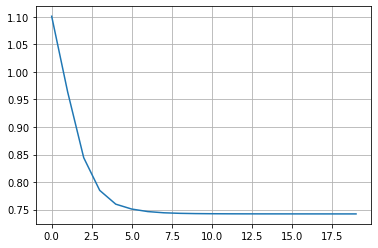

In [426]:
model = Sequential([
                   Dense(13,activation='sigmoid', input_shape=[8]),
                   Dense(11, activation='sigmoid', input_shape=[8]),
                   Dense(9, activation='sigmoid', input_shape=[8]),
                   Dense(7, activation='sigmoid', input_shape=[8]),
                         ])
model.compile(loss='mean_squared_error', optimizer=Nadam(lr=0.0001), metrics=['mean_absolute_error'])

X_train1 = np.asarray(X_train1).astype(np.float32)

y_train1 = np.asarray(y_train1).astype(np.float32)

X_test1 = np.asarray(X_test1).astype(np.float32)

history=model.fit(X_train1, y_train1, batch_size=200, epochs=20)

res = model.predict(X_test1, verbose = 0)
res = np.array(res)
detres = res * scaler.scale_[-1] + scaler.mean_[-1]
detsource = y_test1 * scaler.scale_[-1] + scaler.mean_[-1]

print(detres)
print(model.layers[0].get_weights())
plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

In [427]:
res = model.predict(X_test1, verbose = 0)
res = np.array(res)
detres = res * scaler.scale_[-1] + scaler.mean_[-1]
detsource = y_test1 * scaler.scale_[-1] + scaler.mean_[-1]

In [429]:
x=[]


In [430]:
from numpy import arange
for i in arange(-10.0, 10.0, 0.1):
  x.append(i)

In [431]:
myarray = np.asarray(x)

In [432]:
v=myarray.reshape(-1,8)

In [349]:
detres.shape

(200007, 7)

In [321]:
X_test1.shape

(200007, 8)

In [433]:
sss=model.predict(v)
y_test1[:25].shape

1/1 [==============================] - 0s 14ms/step


(25, 7)

In [434]:
from sklearn import metrics
print("Максимальная ошибка  на тестовом наборе: {:.2f}".format(metrics.mean_absolute_error(sss,detsource[:25])))

Максимальная ошибка  на тестовом наборе: 0.53


In [342]:
y_test1

array([[ 2.75967146e-02, -5.09462352e-01, -4.84004402e-01, ...,
         2.24690394e-03,  2.24690394e-03,  2.75967146e-02],
       [ 2.50237898e-03,  7.29532961e-01,  7.29013591e-01, ...,
         4.49731304e-05,  4.49731304e-05,  2.50237898e-03],
       [ 1.91009093e-01, -8.55276983e-01, -8.27392991e-01, ...,
         1.64429316e-02,  1.64429316e-02,  1.91009093e-01],
       ...,
       [ 2.48811447e-03,  1.03857339e+00,  1.03138294e+00, ...,
         4.36791216e-05,  4.36791216e-05,  2.48811447e-03],
       [ 2.48970184e-03,  9.60809269e-01,  9.55297526e-01, ...,
         4.38238854e-05,  4.38238854e-05,  2.48970184e-03],
       [ 2.48679346e-03,  1.15180924e+00,  1.14217431e+00, ...,
         4.35582774e-05,  4.35582774e-05,  2.48679346e-03]])

In [343]:
sss

array([[ -3.4593062 ,  -1.6511676 ,  -1.557725  ,  -1.5189536 ,
        -17.639482  , -17.36426   ,  -3.4362965 ],
       [ -3.572784  ,  -1.6854769 ,  -1.5922087 ,  -1.5532039 ,
        -17.093292  , -16.825266  ,  -3.5504932 ],
       [ -3.700366  ,  -1.7234143 ,  -1.6277994 ,  -1.5886106 ,
        -16.422525  , -16.163864  ,  -3.6789112 ],
       [ -3.8316143 ,  -1.7640986 ,  -1.6632187 ,  -1.6240796 ,
        -15.612964  , -15.366903  ,  -3.8112826 ],
       [ -3.9462328 ,  -1.8052561 ,  -1.6961787 ,  -1.657631  ,
        -14.656165  , -14.427353  ,  -3.9276018 ],
       [ -4.0115204 ,  -1.8423026 ,  -1.7227623 ,  -1.6857778 ,
        -13.548343  , -13.343042  ,  -3.995555  ],
       [ -3.9828923 ,  -1.8669822 ,  -1.7362865 ,  -1.7022777 ,
        -12.2810545 , -12.106896  ,  -3.9708586 ],
       [ -3.8110592 ,  -1.8650113 ,  -1.7250017 ,  -1.6955305 ,
        -10.820709  , -10.685295  ,  -3.803937  ],
       [ -3.4571664 ,  -1.8112957 ,  -1.6676459 ,  -1.6436409 ,
         -9.0883

In [449]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np


In [463]:
cmap, norm = mcolors.from_levels_and_colors([0, 2, 5, 6], ['red', 'green', 'blue'])

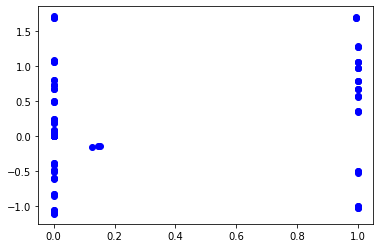

In [476]:
plt.scatter(sss,y_test1[:25],c='blue')


In [215]:
y_train1.shape

(800025, 7)

In [40]:
X_test1.dtype

dtype('float32')